## Support Vector Machines

In this lab, we will study support vector machines using scikit-learn.  We will first discuss the linear separable case then the non linear separable case where we utilize the kernel tricks.  We then investigate the effect of tuning the hyperparameters $C$ and $\gamma$ for the RBF/Gaussian kernel

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

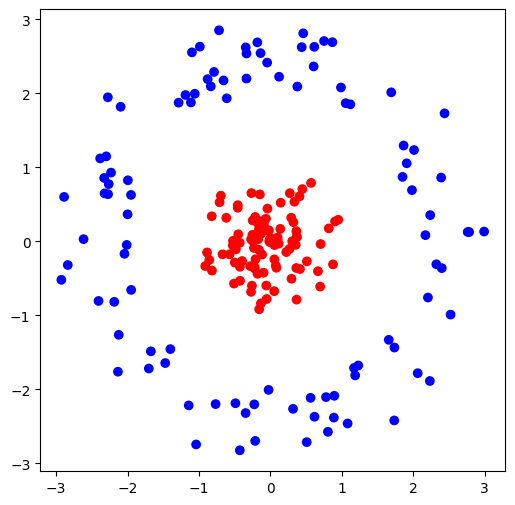

In [2]:
data = pd.read_csv("circular.csv")

features = data[["x", "y"]]
target = data["class"]
colors = ["red" if cl==0 else "blue" for cl in target]

plt.figure(figsize = (6, 6))
plt.scatter( features["x"], features["y"] , c=colors)

#### Ex 1: Create a new feature to make dataset linearly separable

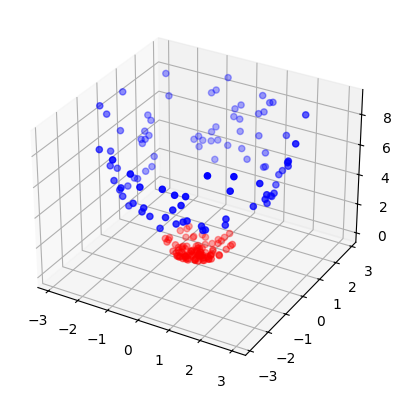

In [3]:
features["z"] = features.x**2 + features.y**2

from mpl_toolkits import mplot3d

xs = features.x
ys = features.y
zs = features.z
target = data["class"]
colors = ["red" if cl==0 else "blue" for cl in target]

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(xs, ys, zs, zdir='z', c=colors)

plt.show()

Before you fit your training data, you first have to decide on a model, be it based on polynomial kernel or Gaussian kernel.  However, even after you choose the model, there are still *hyperparameters* that you need to fix.  One of them is the parameter $C$. <br>

$C$ is a parameter you can choose to *regularize* your model.  It allows you to penalize a complex model in favour of a simpler model to prevent overfitting. Another way to think about it is - it lets you control the number of mis-classified points in the hope that it generalizes better.<br>

Hence, a larger $C$ tends to overfit as the model tries to learn from the training data as much as possible.  A smaller $C$, on the other hand, tends to generalize to unseen dataset better.

#### Ex 2: Tuning $C$ and $\gamma$ 

In this exercise, import the dataset *non_linear.csv*.  We will use the Gaussian/RBF kernel.  However you will need to find out which $C$ and $\gamma$ give the best results, based on accuracy metric.  Please use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html"> GridSearchCV </a> to determine the best classifier.  Remember to split the dataset into training and test set.  Finally report the parameters associated with the best classifer, and the accuracy on test set

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score

df = pd.read_csv("non_linear.csv")
X = df[["x", "y"]]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

svc = svm.SVC(kernel="rbf")
ranges = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
param_grid = {"C":ranges, "gamma":ranges}

clf = GridSearchCV(svc, param_grid=param_grid, scoring="accuracy", cv=3)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = f1_score(y_test, y_pred)

print(acc)
print(clf.best_params_)

0.8888888888888888
{'C': 3, 'gamma': 3}
